In [1]:
import pandas as pd
import seaborn as sns

In [2]:
data_set=pd.read_csv('Fraud_check.csv')
data_set.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


### Inital investigation

In [3]:
data_set.shape

(600, 6)

In [4]:
data_set.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [5]:
data_set.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

Number of features and records in the given data set is 6 and 600 respesctively

There is no null values in the data set

The categorical data can be converted into numeric data type by using encoder so that the model can learn the things more easily

### Data preprocessing

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [8]:
data_set['Undergrad']=le.fit_transform(data_set['Undergrad'])
data_set['Marital.Status']=le.fit_transform(data_set['Marital.Status'])
data_set['Urban']=le.fit_transform(data_set['Urban'])
data_set.dtypes

Undergrad          int32
Marital.Status     int32
Taxable.Income     int64
City.Population    int64
Work.Experience    int64
Urban              int32
dtype: object

In [9]:
data_set.insert(6,'tax_category','')
data_set

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,tax_category
0,0,2,68833,50047,10,1,
1,1,0,33700,134075,18,1,
2,0,1,36925,160205,30,1,
3,1,2,50190,193264,15,1,
4,0,1,81002,27533,28,0,
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,
596,1,0,69967,55369,2,1,
597,0,0,47334,154058,0,1,
598,1,1,98592,180083,17,0,


In [10]:
import warnings
warnings.filterwarnings('ignore')

#### Converting taxable income to category of 0 and 1

In [15]:
for i in range(0,len(data_set['tax_category']),1):
    if data_set['Taxable.Income'][i]<=30000:
        data_set['tax_category'][i]='1'
    else:
        data_set['tax_category'][i]='0'

In [16]:
data_set['tax_category'].unique()

array([0, 1])

In [17]:
data_set['tax_category']=data_set['tax_category'].astype(int)

In [18]:
data_set.dtypes

Undergrad          int32
Marital.Status     int32
Taxable.Income     int64
City.Population    int64
Work.Experience    int64
Urban              int32
tax_category       int32
dtype: object

### Model building

In [19]:
x=data_set.loc[:,('Undergrad','Marital.Status','City.Population','Work.Experience','Urban')]
y=data_set['tax_category']

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

### Model training

In [21]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()

In [22]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

### Model testing

In [23]:
y_pred_train=dt_model.predict(x_train)
y_pred_test=dt_model.predict(x_test)

### Model Evaluation

In [24]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve

In [25]:
print(classification_report(y_train,y_pred_train))
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       385
           1       1.00      1.00      1.00        95

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480

              precision    recall  f1-score   support

           0       0.73      0.77      0.75        91
           1       0.12      0.10      0.11        29

    accuracy                           0.61       120
   macro avg       0.43      0.44      0.43       120
weighted avg       0.58      0.61      0.60       120



In [26]:
print(accuracy_score(y_train,y_pred_train))
print(accuracy_score(y_test,y_pred_test))

1.0
0.6083333333333333


In [27]:
print(confusion_matrix(y_train,y_pred_train))
print(confusion_matrix(y_test,y_pred_test))

[[385   0]
 [  0  95]]
[[70 21]
 [26  3]]


<AxesSubplot:>

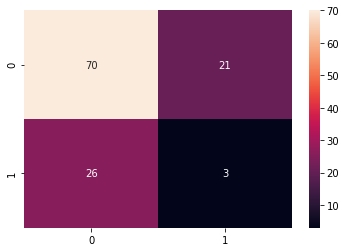

In [68]:
confusion_matrix_test=confusion_matrix(y_test,y_pred_test)
sns.heatmap(confusion_matrix_test,annot=True)

In [28]:
auc_train = roc_auc_score(y_train, y_pred_train)
print('auc value for train data',auc_train)
auc_test= roc_auc_score(y_test, y_pred_test)
print('auc value for test data',auc_test)

auc value for train data 1.0
auc value for test data 0.43633952254641906


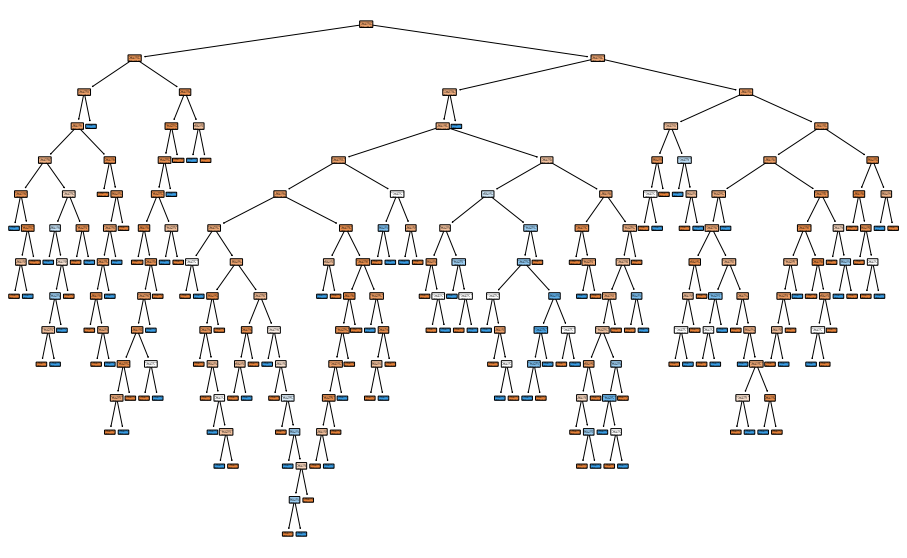

In [29]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(16,10))
tree.plot_tree(dt_model,rounded=True,filled=True)
plt.show()

auc value for test data 0.43633952254641906


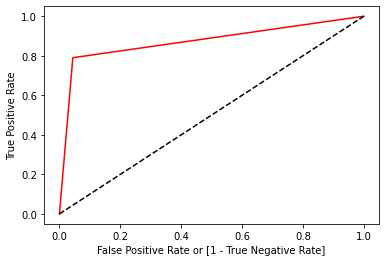

In [30]:
fpr, tpr, thresholds = roc_curve(y,dt_model.predict_proba (x)[:,1])

plt.plot(fpr, tpr, color='red')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

auc_test= roc_auc_score(y_test, y_pred_test)
print('auc value for test data',auc_test)

### GridSearchCV

In [31]:
from sklearn.model_selection import GridSearchCV
grid_model=GridSearchCV(estimator = dt_model,param_grid={'criterion':['entropy','gini'],
                                                       'max_depth':[2,4,8,10],
                                                        'min_samples_split':[2,4,6,8],
                                                        'min_samples_leaf':[1,2,3,4]})
grid_model.fit(x_train,y_train)
print(grid_model.best_params_)
print(grid_model.best_score_)

{'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2}
0.8020833333333334


In [32]:
from sklearn.tree import DecisionTreeClassifier
dt_model_tweak=DecisionTreeClassifier(criterion='entropy',max_depth=2)

In [33]:
dt_model_tweak.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [34]:
y_pred_train_tweak=dt_model_tweak.predict(x_train)
y_pred_test_tweak=dt_model_tweak.predict(x_test)

In [35]:
print(classification_report(y_test,y_pred_test_tweak))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86        91
           1       0.00      0.00      0.00        29

    accuracy                           0.76       120
   macro avg       0.38      0.50      0.43       120
weighted avg       0.58      0.76      0.65       120



In [36]:
print(accuracy_score(y_test,y_pred_test_tweak))

0.7583333333333333


In [37]:
auc_test= roc_auc_score(y_test, y_pred_test_tweak)
print('auc value for test data',auc_test)

auc value for test data 0.5


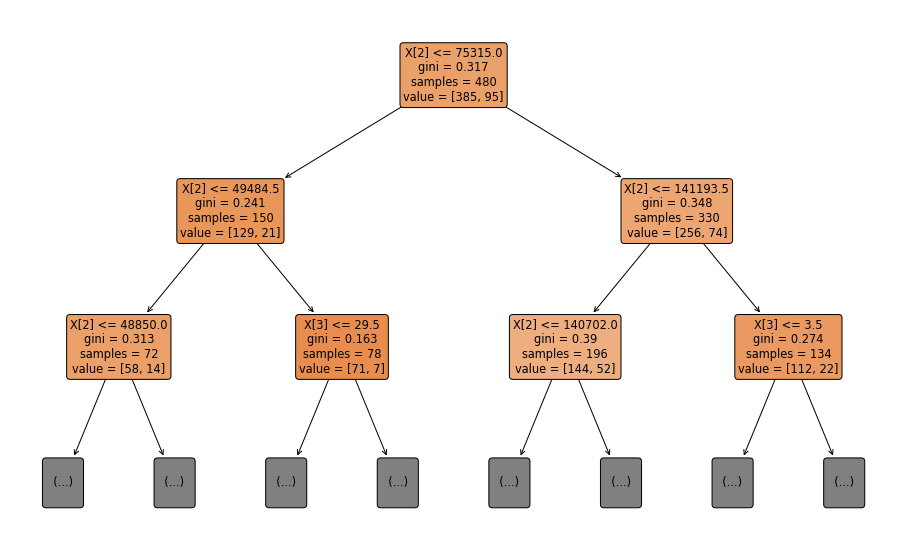

In [38]:
from sklearn import tree
plt.figure(figsize=(16,10))
tree.plot_tree(dt_model,rounded=True,filled=True,max_depth=2)
plt.show()

auc value for test data 0.5


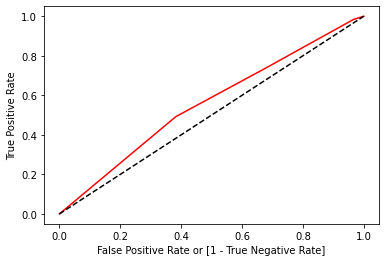

In [39]:
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y,dt_model_tweak.predict_proba (x)[:,1])

plt.plot(fpr, tpr, color='red')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

auc_test= roc_auc_score(y_test, y_pred_test_tweak)
print('auc value for test data',auc_test)

### Check for data imbalance

In [40]:
data_set['tax_category'].value_counts()

0    476
1    124
Name: tax_category, dtype: int64

<AxesSubplot:xlabel='tax_category', ylabel='count'>

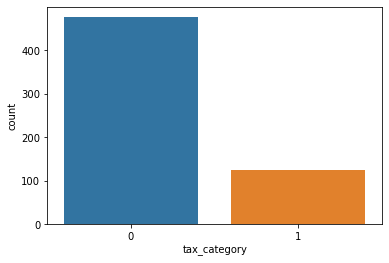

In [54]:
sns.countplot(data_set['tax_category'])

Countplot clearly shows that, the data are highly imbalanced, it may affect the accuaracy of the model

It need to be balanced for obtaining best model

#### Data balancing by adjusting class weights

In [72]:
dt_model_imb=DecisionTreeClassifier(class_weight={0:1,1:5}).fit(x_train,y_train)

In [73]:
y_pred=dt_model_imb.predict(x_test)

In [74]:
print(accuracy_score(y_test,y_pred))

0.625


<AxesSubplot:>

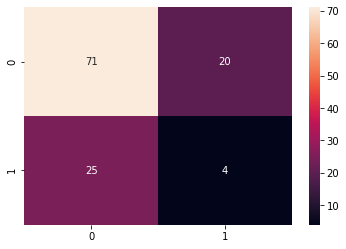

In [75]:
confusion_matrix_test=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_matrix_test,annot=True)

#### Data balancing - SMOTE

In [58]:
!pip install imblearn

In [59]:
from imblearn.over_sampling import SMOTE

In [60]:
smote=SMOTE(sampling_strategy='minority')

In [61]:
x_sm,y_sm=smote.fit_resample(x,y)

In [62]:
x_train_sm,x_test_sm,y_train_sm,y_test_sm=train_test_split(x_sm,y_sm,test_size=0.2)

In [63]:
dt_model_smote=DecisionTreeClassifier().fit(x_train_sm,y_train_sm)

In [64]:
y_pred_smote=dt_model_smote.predict(x_test_sm)

In [65]:
print(accuracy_score(y_test_sm,y_pred_smote))

0.6596858638743456


<AxesSubplot:>

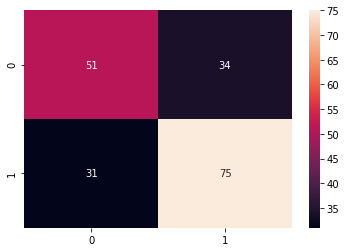

In [71]:
confusion_matrix_test=confusion_matrix(y_test_sm,y_pred_smote)
sns.heatmap(confusion_matrix_test,annot=True)

auc value for test data 0.6537735849056603


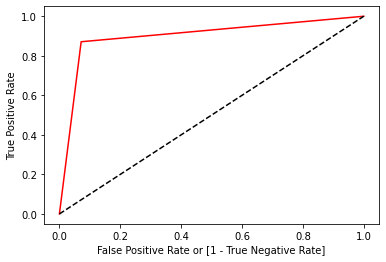

In [66]:
fpr, tpr, thresholds = roc_curve(y,dt_model_smote.predict_proba (x)[:,1])

plt.plot(fpr, tpr, color='red')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

auc_test= roc_auc_score(y_test_sm, y_pred_smote)
print('auc value for test data',auc_test)

The result clearly shows that accuarcy gets improved by balancing the data